# <center> <font color='#8e44c7'> Customer Segmentation using Fuzzy Clustering </font>   </center>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

import matplotlib.pyplot as plt

### Clustering Metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

<a id="1"></a>  

### <font color='#8e44c7'>  Loading Dataset  </font>

In [3]:
mall_dataset = pd.read_csv('./cust_dataset.csv')

In [4]:
mall_dataset.head(5)

,Customer ID,Gender,Interest to Buy,Category,Spending Score
0,1,0,0.76,4.27,0.85
1,2,1,0.88,5.81,0.97
2,3,0,0.42,2.11,0.63
3,4,1,0.95,6.68,0.92
4,5,0,0.73,2.73,0.79


<a id="2"></a>  

### <font color='#8e44c7'>  Preparing Data  </font>

In [5]:
mall_dataset.columns

Index(['Customer ID', 'Gender', 'Interest to Buy', 'Category',
       'Spending Score'],
      dtype='object')

In [6]:
mall_dataset.shape

(400, 5)

In [7]:
### we don't need customer id and gender
mall_dataset['Customer ID'].nunique()
mall_dataset.drop(['Customer ID'], axis=1, inplace=True)
#mall_dataset = mall_dataset[0:150]


In [8]:
mall_dataset.head(10)

,Gender,Interest to Buy,Category,Spending Score
0,0,0.76,4.27,0.85
1,1,0.88,5.81,0.97
2,0,0.42,2.11,0.63
3,1,0.95,6.68,0.92
4,0,0.73,2.73,0.79
5,0,0.56,1.21,0.45
6,1,0.32,4.92,0.17
7,1,0.79,6.09,0.75
8,0,0.63,2.92,0.72
9,1,0.41,5.42,0.61


#### Checking for missing values

In [9]:
# out of total rows how many rows of them are Null

side_by_side(mall_dataset.isnull().sum(), mall_dataset.count())

Gender             0    Gender             400
Interest to Buy    0    Interest to Buy    400
Category           0    Category           400
Spending Score     0    Spending Score     400
dtype: int64            dtype: int64          



<a id="3"></a>  

### <font color='#8e44c7'>  Visualizing Data  </font>

#### by Gender

In [10]:
male_customers = mall_dataset[mall_dataset.Gender == 0].shape[0]
female_customers = mall_dataset[mall_dataset.Gender == 1].shape[0]
px.pie(values=[male_customers, female_customers], names=['Male', 'Female' ], title='Gender', width=600, height=400)

In [11]:
fig = px.box(mall_dataset, y="Category", x='Gender', width=600, height=400)
fig.show()

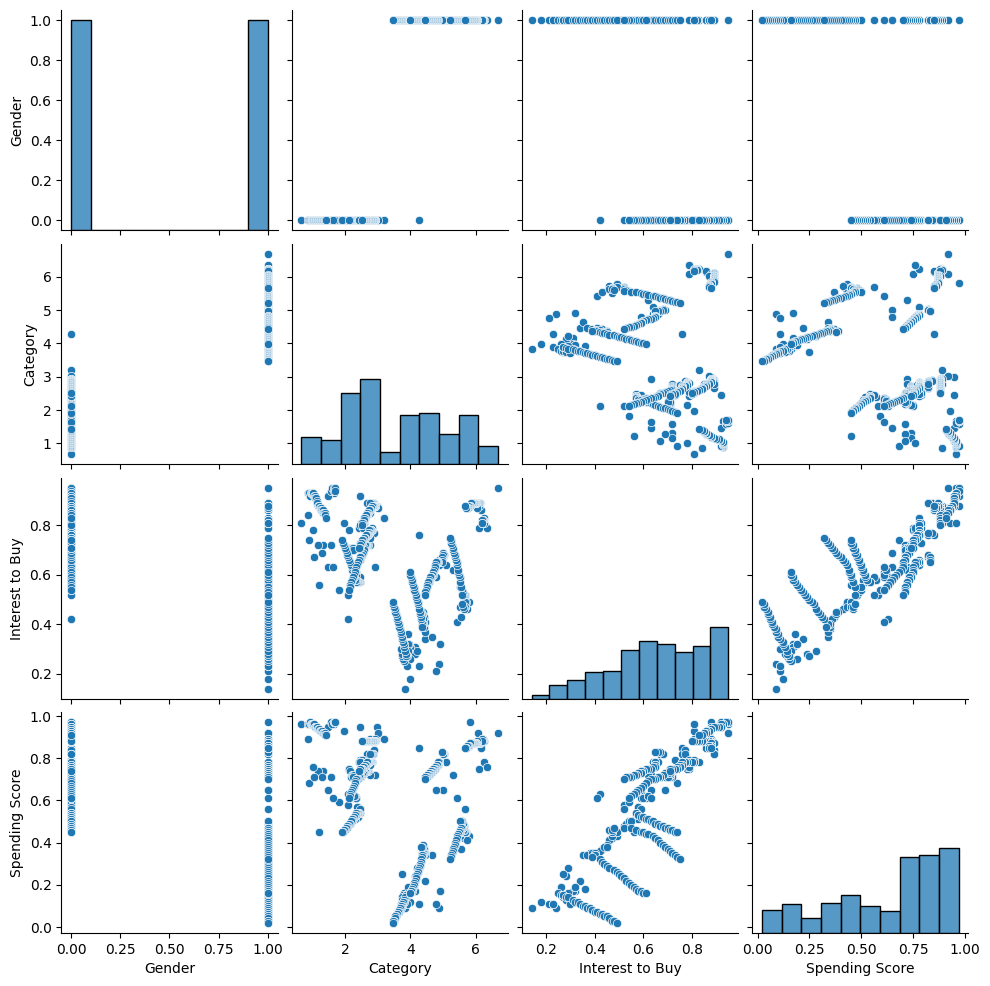

In [12]:
sns.pairplot(mall_dataset[['Gender', 'Category',"Interest to Buy",
       'Spending Score']]);

#### Distribution of Interest to Buy

In [13]:
fig = px.histogram(mall_dataset, x="Interest to Buy", color="Gender", marginal="rug", width=600, height=400)
fig.show()

#### Distribution of Spending Score

In [14]:
fig = px.histogram(mall_dataset, x="Spending Score", color="Gender", marginal="rug", width=600, height=400)
fig.show()

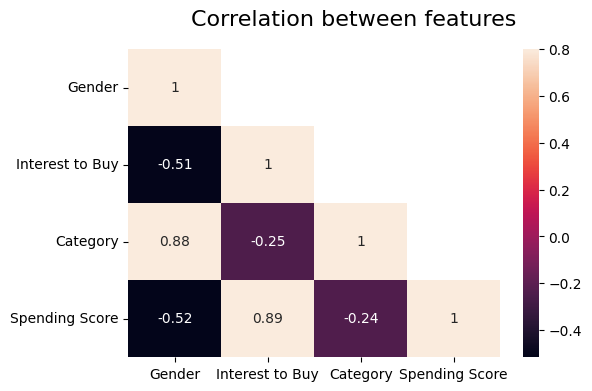

In [15]:
fig,ax = plt.subplots(figsize=(6,4)) ## play with size
fig.suptitle("Correlation between features", fontsize=16)
corrcoef = mall_dataset.corr()
mask = np.array(corrcoef)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrcoef, mask=mask, vmax=.8, annot=True, ax=ax)
plt.show();

<a id="4"></a>  

### <font color='#8e44c7'>  Clustering  </font>

#### Fuzzy C-Means Clustering

In [37]:
! pip install fuzzy-c-means

  Attempting uninstall: typer
    Found existing installation: typer 0.7.0
    Uninstalling typer-0.7.0:
      Successfully uninstalled typer-0.7.0


In [16]:
# we dont need gender as well
mall_dataset.drop(['Gender'], axis=1, inplace=True)
number_clusters = 3
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
new_cust=st.fit_transform(mall_dataset)

In [17]:
from fcmeans import FCM

fcm = FCM(n_clusters=number_clusters)
fcm.fit(new_cust)

# outputs
cntrs = fcm.centers
pred= fcm.predict(new_cust)

In [18]:
cntrs

array([[ 0.42391324,  1.15723355,  0.55003768],
       [-1.3114702 ,  0.40668901, -1.39507001],
       [ 0.60378803, -0.82397084,  0.60793028]])

In [19]:
mall_dataset['Fuzzy_cluster'] = pred

In [20]:
mall_dataset.head()

,Interest to Buy,Category,Spending Score,Fuzzy_cluster
0,0.76,4.27,0.85,0
1,0.88,5.81,0.97,0
2,0.42,2.11,0.63,1
3,0.95,6.68,0.92,0
4,0.73,2.73,0.79,2


In [22]:
# visualize clusters
figure = px.scatter_3d(mall_dataset,
                    color='Fuzzy_cluster',
                    x="Category",
                    y="Interest to Buy",
                    z="Spending Score",
                    category_orders = {"clusters": ["0", "1", "2"]},
                     color_continuous_scale=px.colors.sequential.Viridis


                    )
figure.update_layout()
figure.show()

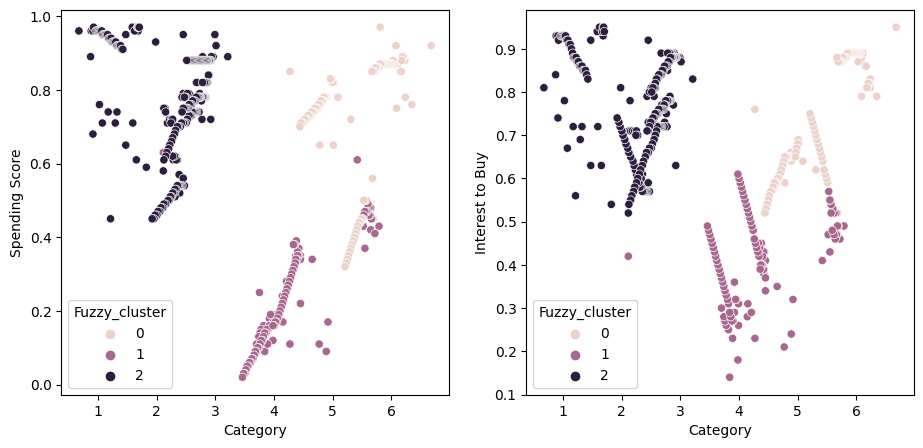

In [23]:
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
sns.scatterplot(x = mall_dataset["Category"], y = mall_dataset["Spending Score"], ax=axes[0], hue=mall_dataset[ "Fuzzy_cluster"])
sns.scatterplot(x = mall_dataset["Category"], y = mall_dataset["Interest to Buy"], ax=axes[1], hue=mall_dataset[ "Fuzzy_cluster"])
#sns.scatterplot(x = cntrs[:,0], y = cntrs[:,1], ax=axes[1],marker="s",s=200)
plt.show()

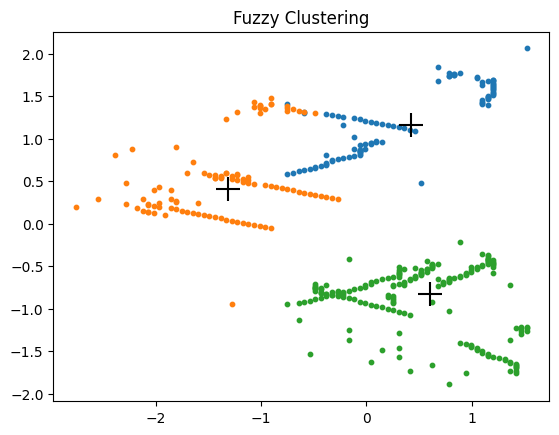

In [24]:
plt.scatter(new_cust[pred == 0, 0], new_cust[pred == 0, 1], s = 10)
plt.scatter(new_cust[pred == 1, 0], new_cust[pred == 1, 1], s = 10 )
plt.scatter(new_cust[pred == 2, 0], new_cust[pred == 2, 1], s = 10 )
plt.scatter(cntrs[:, 0], cntrs[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Fuzzy Clustering')
plt.show()

#### Evaluating Fuzzy C-Means

In [25]:
print("Silhouette score: {}".format(silhouette_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), pred)))
print("Davies Bouldin score: {}".format(davies_bouldin_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), pred)))
print("Calinski Harabasz score: {}".format(calinski_harabasz_score(mall_dataset.drop(['Fuzzy_cluster'], axis=1), pred)))

Silhouette score: 0.5187805401197683
Davies Bouldin score: 0.819370879162166
Calinski Harabasz score: 898.562828679806
